## BUSINESS INTELLIGENCE ANALYSIS 

#### Business Understanding
The client collected transactional sales data throughout 2019 but has not yet maximized its potential to inform business decisions. Their objective is to gain actionable insights from this data, particularly to boost sales and improve operational efficiency.

The client’s primary goals involve analyzing key performance indicators to understand sales patterns, identify top and underperforming products, evaluate geographic distribution, and categorize products based on pricing. By doing this, they hope to uncover trends that can shape future strategies and optimize decision-making processes.

#### Problem Statement:
The client has accumulated a full year’s worth of transactional data for 2019 but has been unable to leverage it effectively to make informed business decisions. Without proper analysis, they lack insights into key metrics like total revenue, sales trends, best and worst-selling products, geographic distribution of orders, and performance of product categories. This lack of visibility prevents the client from identifying opportunities to drive sales, optimize operations, and make data-driven decisions.

#### Project Goal
The business goal is to design and deliver a comprehensive Business Intelligence (BI) solution that analyzes the client’s 2019 transactional data to uncover insights into sales performance, product trends, and customer behavior. The objective is to provide actionable insights that will help the client increase sales, optimize operations, and make informed, data-driven decisions.

#### Hypothesis
- Null Hypothesis (H₀): There is no significant variation in the total revenue generated across different months in 2019.
- Alternative Hypothesis (H₁): There is a significant variation in the total revenue generated across different months in 2019.

##### Key Business Questions:
- Revenue Analysis: How much total revenue was generated in 2019? This involves calculating the sum of sales and identifying peaks and lows in earnings.
- Seasonality: Are there seasonal patterns in sales? Identifying whether sales fluctuate during certain times of the year (months, quarters) can guide inventory and marketing strategies.
- Product Performance: Which products are the best and worst sellers? This analysis will inform product lifecycle decisions, promotion strategies, and possible discontinuation of low-performing items.
- Sales Trends: How do sales compare across different periods (monthly, weekly)? Trends over time will provide insights into growth patterns or slow periods.
- Geographic Insights: What cities receive the most product deliveries? Knowing the geographic hotspots can help in resource allocation, marketing efforts, and logistical planning.
- Product Categories: How do product categories perform in terms of revenue and quantity ordered? Understanding which categories drive the most value will assist in shaping inventory and marketing priorities.

#### Features
- Order_ID: It is the unique number of a purchased product
- Product: Type of product purchased.
- Quantity_Ordered: Number of products purchased
- Price_Each: Price per unit of each product purchased
- Order_Date: The date the product was purchased
- Purchase_Address: The address of the customer


### Data Preparation and Understanding

In [21]:
# importing the necessary packages

import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import squarify
import re
from datetime import datetime

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

import warnings
warnings.filterwarnings('ignore')

In [27]:
#Load environment variables from .env file into a dictionary
environment_variables = dotenv_values(r'C:\Users\MERCY CHEBET\Desktop\Azubi\Business-Intelligence-Analysis\.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("database")
server = environment_variables.get("server")
username = environment_variables.get("username")
password = environment_variables.get("password")

connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [28]:
# Use the connect method of the pyodbc library and pass in the connection string. 

connection = pyodbc.connect(connection_string)

In [29]:
db_query='''SELECT * 
FROM INFORMATION_SCHEMA.TABLES
WHERE TABLE_SCHEMA= 'dbo' '''

data_2= pd.read_sql(db_query, connection)

data_2

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,dapDB,dbo,Sales_July_2019,BASE TABLE
1,dapDB,dbo,Sales_August_2019,BASE TABLE
2,dapDB,dbo,Sales_September_2019,BASE TABLE
3,dapDB,dbo,Sales_October_2019,BASE TABLE
4,dapDB,dbo,Sales_November_2019,BASE TABLE
5,dapDB,dbo,Sales_December_2019,BASE TABLE


In [30]:
# Loading the data
#Loading July_2019
query = "SELECT * FROM dbo.Sales_July_2019"
Jul_2019 = pd.read_sql(query, connection)

#Loading Aug_2019 
query = "SELECT * FROM dbo.Sales_August_2019"
Aug_2019 = pd.read_sql(query, connection)

#Loading Sep_2019 
query = "SELECT * FROM dbo.Sales_September_2019"
Sep_2019 = pd.read_sql(query, connection)

#Loading Oct_2019 
query = "SELECT * FROM dbo.Sales_October_2019"
Oct_2019 = pd.read_sql(query, connection)

#Loading Nov_2019 
query = "SELECT * FROM dbo.Sales_November_2019"
Nov_2019 = pd.read_sql(query, connection)

#Loading Dec_2019 
query = "SELECT * FROM dbo.Sales_December_2019"
Dec_2019 = pd.read_sql(query, connection)

In [31]:
#Load the data from the CSV files (Jan_2019 - Jun_2019)


Jan_2019= pd.read_csv('../Data/Sales_January_2019.csv')
Feb_2019= pd.read_csv('../Data/Sales_February_2019.csv')
Mar_2019= pd.read_csv('../Data/Sales_March_2019.csv')
Apr_2019= pd.read_csv('../Data/Sales_April_2019.csv')
May_2019= pd.read_csv('../Data/Sales_May_2019.csv')
Jun_2019= pd.read_csv('../Data/Sales_June_2019.csv')

### Data Exploration (EDA) & cleaning

In [34]:
# Overview of the datasets
Jan_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [33]:
Feb_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [35]:
Mar_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [36]:
Apr_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [37]:
May_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


In [38]:
Jun_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [39]:
Jul_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"


In [40]:
Aug_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670.0,Wired Headphones,2.0,11.990000,2031-08-19 22:21:00.0000000,"359 Spruce St, Seattle, WA 98101"
1,236671.0,Bose SoundSport Headphones,1.0,99.989998,2015-08-19 15:11:00.0000000,"492 Ridge St, Dallas, TX 75001"
2,236672.0,iPhone,1.0,700.000000,2006-08-19 14:40:00.0000000,"149 7th St, Portland, OR 97035"
3,236673.0,AA Batteries (4-pack),2.0,3.840000,2029-08-19 20:59:00.0000000,"631 2nd St, Los Angeles, CA 90001"
4,236674.0,AA Batteries (4-pack),2.0,3.840000,2015-08-19 19:53:00.0000000,"736 14th St, New York City, NY 10001"


In [41]:
Sep_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,248151.0,AA Batteries (4-pack),4.0,3.840000,2017-09-19 14:44:00.0000000,"380 North St, Los Angeles, CA 90001"
1,248152.0,USB-C Charging Cable,2.0,11.950000,2029-09-19 10:19:00.0000000,"511 8th St, Austin, TX 73301"
2,248153.0,USB-C Charging Cable,1.0,11.950000,2016-09-19 17:48:00.0000000,"151 Johnson St, Los Angeles, CA 90001"
3,248154.0,27in FHD Monitor,1.0,149.990005,2027-09-19 07:52:00.0000000,"355 Hickory St, Seattle, WA 98101"
4,248155.0,USB-C Charging Cable,1.0,11.950000,2001-09-19 19:03:00.0000000,"125 5th St, Atlanta, GA 30301"


In [42]:
Oct_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,259358.0,34in Ultrawide Monitor,1.0,379.989990,2028-10-19 10:56:00.0000000,"609 Cherry St, Dallas, TX 75001"
1,259359.0,27in 4K Gaming Monitor,1.0,389.989990,2028-10-19 17:26:00.0000000,"225 5th St, Los Angeles, CA 90001"
2,259360.0,AAA Batteries (4-pack),2.0,2.990000,2024-10-19 17:20:00.0000000,"967 12th St, New York City, NY 10001"
3,259361.0,27in FHD Monitor,1.0,149.990005,2014-10-19 22:26:00.0000000,"628 Jefferson St, New York City, NY 10001"
4,259362.0,Wired Headphones,1.0,11.990000,2007-10-19 16:10:00.0000000,"534 14th St, Los Angeles, CA 90001"


In [43]:
Nov_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,278797.0,Wired Headphones,1.0,11.990000,2021-11-19 09:54:00.0000000,"46 Park St, New York City, NY 10001"
1,278798.0,USB-C Charging Cable,2.0,11.950000,2017-11-19 10:03:00.0000000,"962 Hickory St, Austin, TX 73301"
2,278799.0,Apple Airpods Headphones,1.0,150.000000,2019-11-19 14:56:00.0000000,"464 Cherry St, Los Angeles, CA 90001"
3,278800.0,27in FHD Monitor,1.0,149.990005,2025-11-19 22:24:00.0000000,"649 10th St, Seattle, WA 98101"
4,278801.0,Bose SoundSport Headphones,1.0,99.989998,2009-11-19 13:56:00.0000000,"522 Hill St, Boston, MA 02215"


In [44]:
Dec_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,295665.0,Macbook Pro Laptop,1.0,1700.000000,2030-12-19 00:01:00.0000000,"136 Church St, New York City, NY 10001"
1,295666.0,LG Washing Machine,1.0,600.000000,2029-12-19 07:03:00.0000000,"562 2nd St, New York City, NY 10001"
2,295667.0,USB-C Charging Cable,1.0,11.950000,2012-12-19 18:21:00.0000000,"277 Main St, New York City, NY 10001"
3,295668.0,27in FHD Monitor,1.0,149.990005,2022-12-19 15:13:00.0000000,"410 6th St, San Francisco, CA 94016"
4,295669.0,USB-C Charging Cable,1.0,11.950000,2018-12-19 12:38:00.0000000,"43 Hill St, Atlanta, GA 30301"


#### Concatinating all the data from Jan 2019 to Dec 2019

In [45]:
# Rename the columns
Jan_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)
Feb_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)
Mar_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)
Apr_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)
May_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)
Jun_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)

In [46]:
# Combine all datasets by column names
sales_df = pd.concat([Jan_2019, Feb_2019, Mar_2019, Apr_2019, May_2019, Jun_2019, Jul_2019, Aug_2019, Sep_2019, Oct_2019, Nov_2019, Dec_2019])

In [47]:
sales_df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.95,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016"
25113,319667.0,AA Batteries (4-pack),2.0,3.84,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001"
25114,319668.0,Vareebadd Phone,1.0,400.0,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101"
25115,319669.0,Wired Headphones,1.0,11.99,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001"


In [48]:
#Summary of the sales data
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          186110 non-null  object
 1   Product           186305 non-null  object
 2   Quantity_Ordered  186110 non-null  object
 3   Price_Each        186110 non-null  object
 4   Order_Date        186110 non-null  object
 5   Purchase_Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [49]:
sales_df.nunique()

Order_ID            178438
Product                 20
Quantity_Ordered        18
Price_Each              40
Order_Date          142396
Purchase_Address    140788
dtype: int64

In [51]:
sales_df.duplicated().sum()

np.int64(1161)

##### Cleaning Price Each

In [52]:
sales_df['Price_Each'].unique()

array(['700', '14.95', '11.99', '149.99', '2.99', '389.99', '11.95',
       '99.99', '150', '1700', '300', '400', '3.84', '600', '109.99',
       '379.99', '999.99', '600.0', nan, 'Price Each', '700.0', '150.0',
       '300.0', '1700.0', 150.0, 300.0, 3.8399999141693115,
       2.990000009536743, 99.98999786376953, 600.0, 11.949999809265137,
       14.949999809265137, 379.989990234375, 11.989999771118164, 400.0,
       149.99000549316406, 109.98999786376953, 999.989990234375,
       389.989990234375, 1700.0, 700.0], dtype=object)

In [55]:
# Cleaning the 'Price_Each' Column
# Convert 'Price_Each' to numeric, forcing errors to NaN
sales_df['Price_Each'] = pd.to_numeric(sales_df['Price_Each'], errors='coerce')

# Calculate the mean of non-NaN values
mean_price = sales_df['Price_Each'].mean()

# Replace NaN values with the calculated mean
sales_df['Price_Each'].fillna(mean_price, inplace=True)

# Verify the result
print(sales_df['Price_Each'].unique())

[ 700.           14.95         11.99        149.99          2.99
  389.99         11.95         99.99        150.         1700.
  300.          400.            3.84        600.          109.99
  379.99        999.99          3.83999991    2.99000001   99.98999786
   11.94999981   14.94999981  379.98999023   11.98999977  149.99000549
  109.98999786  999.98999023  389.98999023]


##### Cleaning Quantity Ordered

In [56]:
sales_df['Quantity_Ordered'].unique()

array(['1', '2', '3', '5', '4', '7', '6', '9', 1.0, 5.0, 2.0, 3.0, 4.0,
       6.0, 7.0, 8.0, 9.0], dtype=object)

In [57]:
# Convert 'Quantity_Ordered' to numeric, forcing errors to NaN
sales_df['Quantity_Ordered'] = pd.to_numeric(sales_df['Quantity_Ordered'], errors='coerce')

# Verify the result
print(sales_df['Quantity_Ordered'].unique())

[1. 2. 3. 5. 4. 7. 6. 9. 8.]


##### Cleaning the Order Date

In [58]:
sales_df['Order_Date'].unique()

array(['01/22/19 21:25', '01/28/19 14:15', '01/17/19 13:33', ...,
       '2001-12-19 12:01:00.0000000', '2009-12-19 06:43:00.0000000',
       '2003-12-19 10:39:00.0000000'], dtype=object)

In [68]:
# Convert 'Order_Date' to datetime format
sales_df['Order_Date'] = pd.to_datetime(sales_df['Order_Date'], errors='coerce')

# Verify the result
print(sales_df['Order_Date'])

0        2019-01-22
1        2019-01-28
2        2019-01-17
3        2019-01-05
4        2019-01-25
            ...    
185945   2011-12-19
185946   2001-12-19
185947   2009-12-19
185948   2003-12-19
185949   2021-12-19
Name: Order_Date, Length: 185950, dtype: datetime64[ns]


In [70]:
# Extract month from 'Order_Date'
sales_df['Month'] = sales_df['Order_Date'].dt.month

# Display the DataFrame with extracted month
print(sales_df)

        Order_ID                     Product  Quantity_Ordered  Price_Each  \
0         141234                      iPhone               1.0  700.000000   
1         141235    Lightning Charging Cable               1.0   14.950000   
2         141236            Wired Headphones               2.0   11.990000   
3         141237            27in FHD Monitor               1.0  149.990000   
4         141238            Wired Headphones               1.0   11.990000   
...          ...                         ...               ...         ...   
185945  319666.0    Lightning Charging Cable               1.0   14.950000   
185946  319667.0       AA Batteries (4-pack)               2.0    3.840000   
185947  319668.0             Vareebadd Phone               1.0  400.000000   
185948  319669.0            Wired Headphones               1.0   11.990000   
185949  319670.0  Bose SoundSport Headphones               1.0   99.989998   

       Order_Date                        Purchase_Address  Mont

#### Extracting city from Purchase_Address

In [84]:
# Extracting City from Physical Address

def extract_city(Purchase_Address):
    pattern = r',\s*([A-Za-z\s]+),\s*[A-Z]{2}\s*\d{5}'
    match = re.search(pattern, Purchase_Address)
    if match:
        return match.group(1)
    else:
        return None

# Apply the function to the 'Purchase_Address' column
sales_df['City'] = sales_df['Purchase_Address'].apply(extract_city)

sales_df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Revenue,Week,City
0,141234,iPhone,1.0,700.000000,2019-01-22,"944 Walnut St, Boston, MA 02215",2019-01,700.000000,2019-01-21,Boston
1,141235,Lightning Charging Cable,1.0,14.950000,2019-01-28,"185 Maple St, Portland, OR 97035",2019-01,14.950000,2019-01-28,Portland
2,141236,Wired Headphones,2.0,11.990000,2019-01-17,"538 Adams St, San Francisco, CA 94016",2019-01,23.980000,2019-01-14,San Francisco
3,141237,27in FHD Monitor,1.0,149.990000,2019-01-05,"738 10th St, Los Angeles, CA 90001",2019-01,149.990000,2018-12-31,Los Angeles
4,141238,Wired Headphones,1.0,11.990000,2019-01-25,"387 10th St, Austin, TX 73301",2019-01,11.990000,2019-01-21,Austin
...,...,...,...,...,...,...,...,...,...,...
185945,319666.0,Lightning Charging Cable,1.0,14.950000,2011-12-19,"14 Madison St, San Francisco, CA 94016",2011-12,14.950000,2011-12-19,San Francisco
185946,319667.0,AA Batteries (4-pack),2.0,3.840000,2001-12-19,"549 Willow St, Los Angeles, CA 90001",2001-12,7.680000,2001-12-17,Los Angeles
185947,319668.0,Vareebadd Phone,1.0,400.000000,2009-12-19,"273 Wilson St, Seattle, WA 98101",2009-12,400.000000,2009-12-14,Seattle
185948,319669.0,Wired Headphones,1.0,11.990000,2003-12-19,"778 River St, Dallas, TX 75001",2003-12,11.990000,2003-12-15,Dallas


In [86]:
# Create a new column 'Product_Level' based on 'Price_Each'
sales_df['Product_Level'] = sales_df['Price_Each'].apply(lambda x: 'high-level' if x > 99.99 else 'basic level')

# Display the first few rows to verify the new column
print(sales_df.head())

  Order_ID                   Product  Quantity_Ordered  Price_Each Order_Date  \
0   141234                    iPhone               1.0      700.00 2019-01-22   
1   141235  Lightning Charging Cable               1.0       14.95 2019-01-28   
2   141236          Wired Headphones               2.0       11.99 2019-01-17   
3   141237          27in FHD Monitor               1.0      149.99 2019-01-05   
4   141238          Wired Headphones               1.0       11.99 2019-01-25   

                        Purchase_Address    Month  Revenue       Week  \
0        944 Walnut St, Boston, MA 02215  2019-01   700.00 2019-01-21   
1       185 Maple St, Portland, OR 97035  2019-01    14.95 2019-01-28   
2  538 Adams St, San Francisco, CA 94016  2019-01    23.98 2019-01-14   
3     738 10th St, Los Angeles, CA 90001  2019-01   149.99 2018-12-31   
4          387 10th St, Austin, TX 73301  2019-01    11.99 2019-01-21   

            City Product_Level  
0         Boston    high-level  
1       

In [87]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity_Ordered  185950 non-null  float64       
 3   Price_Each        185950 non-null  float64       
 4   Order_Date        185950 non-null  datetime64[ns]
 5   Purchase_Address  185950 non-null  object        
 6   Month             185950 non-null  period[M]     
 7   Revenue           185950 non-null  float64       
 8   Week              185950 non-null  datetime64[ns]
 9   City              185950 non-null  object        
 10  Product_Level     185950 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(5), period[M](1)
memory usage: 15.6+ MB


### Hypothesis Testing

In [72]:
# Calculate Revenue
sales_df['Revenue'] = sales_df['Quantity_Ordered'] * sales_df['Price_Each']

# Aggregate total revenue by month
monthly_revenue = sales_df.groupby('Month')['Revenue'].sum().reset_index()

# Create DataFrame for ANOVA
anova_df = sales_df.copy()

# Perform ANOVA
model = ols('Revenue ~ C(Month)', data=anova_df).fit()
anova_results = anova_lm(model, typ=2)

# Display ANOVA results
print(anova_results)

# Check for significant differences
if anova_results['PR(>F)'][0] < 0.05:
    print("Reject the null hypothesis: There is significant variation in revenue across different months.")
else:
    print("Fail to reject the null hypothesis: There is no significant variation in revenue across different months.")

                sum_sq        df        F    PR(>F)
C(Month)  1.362230e+06      11.0  1.11733  0.342207
Residual  2.060840e+10  185938.0      NaN       NaN
Fail to reject the null hypothesis: There is no significant variation in revenue across different months.


### Answering the Business Questions

1. Revenue Analysis: How much total revenue was generated in 2019?

In [73]:
# Calculate total revenue
sales_df['Revenue'] = sales_df['Quantity_Ordered'] * sales_df['Price_Each']
total_revenue = sales_df['Revenue'].sum()
print(f"Total revenue for the year: ${total_revenue:,.2f}")

Total revenue for the year: $34,492,035.88


2. Seasonality: Are there seasonal patterns in sales?

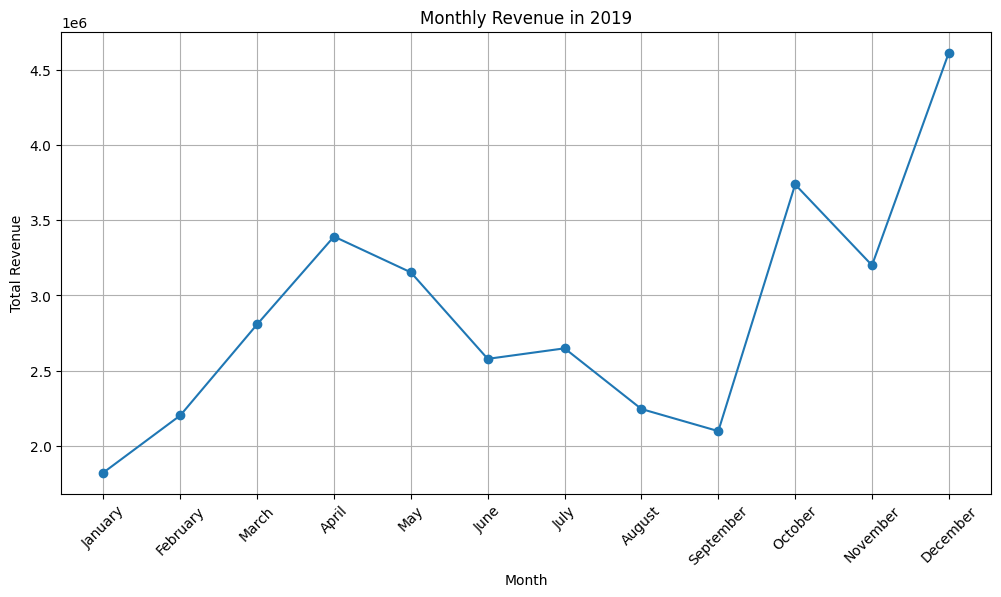

In [75]:
# Ensure 'Month' is treated as a categorical type for plotting
sales_df['Month'] = sales_df['Month'].astype(str)

# Calculate total revenue for each month
monthly_revenue = sales_df.groupby('Month')['Revenue'].sum().reset_index()
monthly_revenue['Month'] = pd.to_datetime(monthly_revenue['Month'], format='%m').dt.strftime('%B')

# Sort by month order
monthly_revenue['Month'] = pd.Categorical(monthly_revenue['Month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
    'September', 'October', 'November', 'December'], ordered=True)
monthly_revenue = monthly_revenue.sort_values('Month')

# Plot monthly revenue
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['Month'], monthly_revenue['Revenue'], marker='o', linestyle='-')
plt.title('Monthly Revenue in 2019')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

3. Product Performance: Which products are the best and worst sellers?

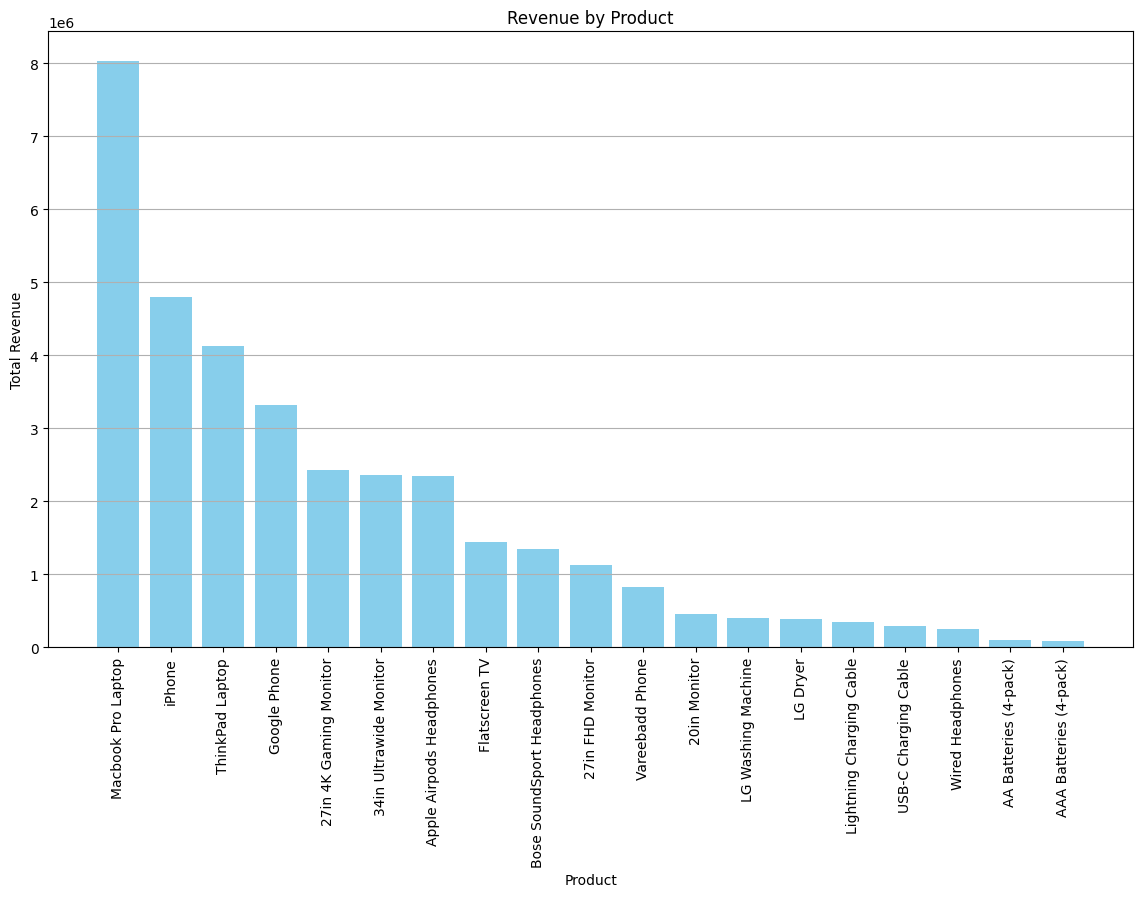

In [78]:
# Aggregate revenue by product
product_sales = sales_df.groupby('Product').agg({'Revenue': 'sum'}).reset_index()

# Sort products by revenue for better visualization
product_sales_sorted = product_sales.sort_values(by='Revenue', ascending=False)

# Plot the bar graph
plt.figure(figsize=(14, 8))
plt.bar(product_sales_sorted['Product'], product_sales_sorted['Revenue'], color='skyblue')
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.show()

4. Sales Trends: How do sales compare across different periods (monthly, weekly)? 

5. Geographic Insights: What cities receive the most product deliveries? 

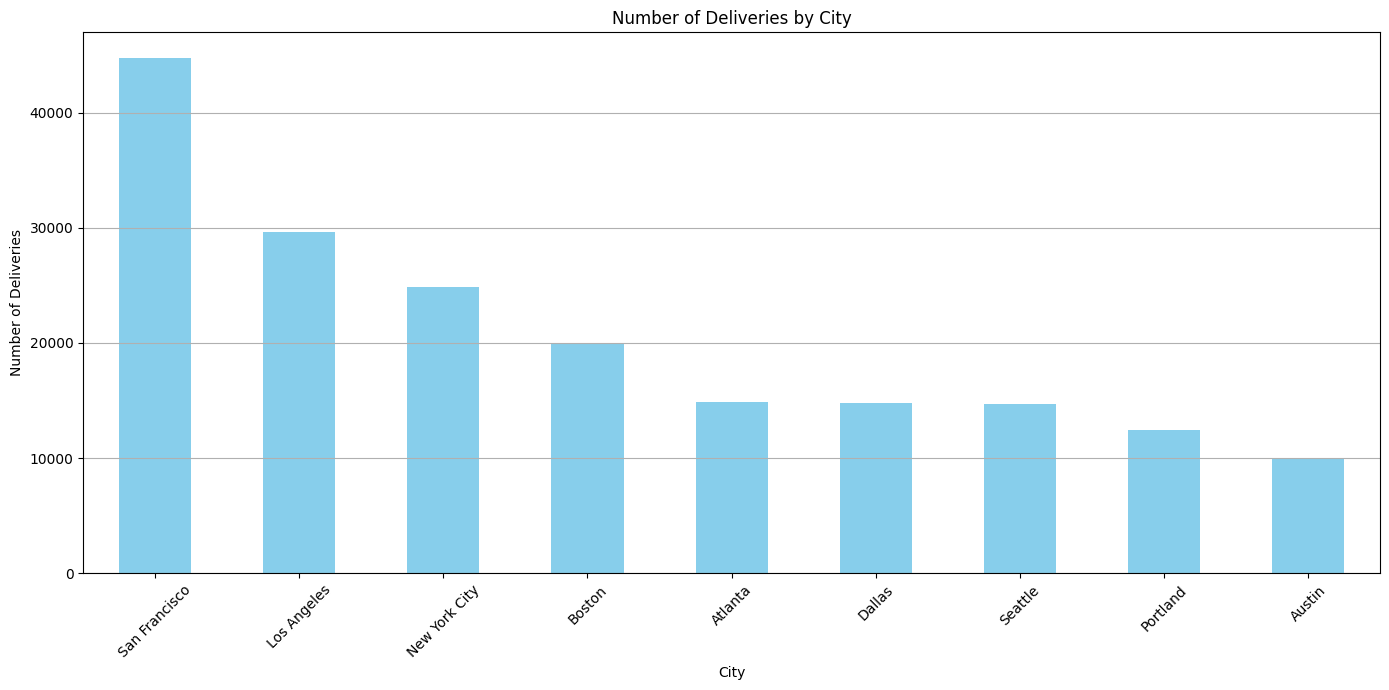

In [85]:
# Count the number of orders per city
city_counts = sales_df['City'].value_counts()

# Plot the bar graph
plt.figure(figsize=(14, 7))
city_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Deliveries by City')
plt.xlabel('City')
plt.ylabel('Number of Deliveries')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

6. Product Categories: How do product categories perform in terms of revenue and quantity ordered?

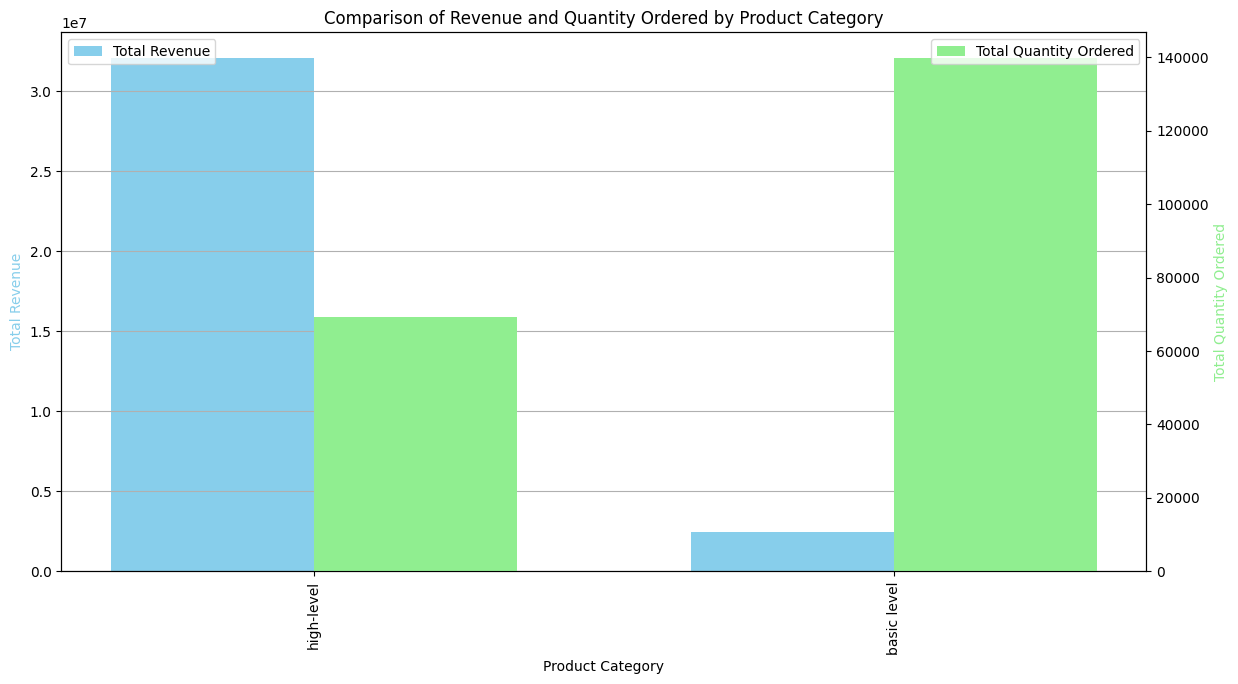

In [96]:
sales_df['Total_Revenue'] = sales_df['Price_Each'] * sales_df['Quantity_Ordered']

# Aggregate data by product category
category_performance = sales_df.groupby('Product_Level').agg(
    Total_Revenue=('Total_Revenue', 'sum'),
    Total_Quantity=('Quantity_Ordered', 'sum')
).reset_index()

# Sort categories by total revenue
category_performance_sorted = category_performance.sort_values(by='Total_Revenue', ascending=False)

# Set up bar positions
categories = category_performance_sorted['Product_Level']
num_categories = len(categories)
bar_width = 0.35
index = np.arange(num_categories)

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bars for Total Revenue
bar1 = ax1.bar(index - bar_width/2, category_performance_sorted['Total_Revenue'], bar_width, label='Total Revenue', color='skyblue')

# Create a second y-axis
ax2 = ax1.twinx()
bar2 = ax2.bar(index + bar_width/2, category_performance_sorted['Total_Quantity'], bar_width, label='Total Quantity Ordered', color='lightgreen')

# Add labels and title
ax1.set_xlabel('Product Category')
ax1.set_ylabel('Total Revenue', color='skyblue')
ax2.set_ylabel('Total Quantity Ordered', color='lightgreen')
ax1.set_title('Comparison of Revenue and Quantity Ordered by Product Category')
ax1.set_xticks(index)
ax1.set_xticklabels(categories, rotation=90)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add grid lines
ax1.grid(axis='y')

plt.show()

7. Distribution of Product Categories

Product_Level
basic level    116986
high-level      68964
Name: count, dtype: int64


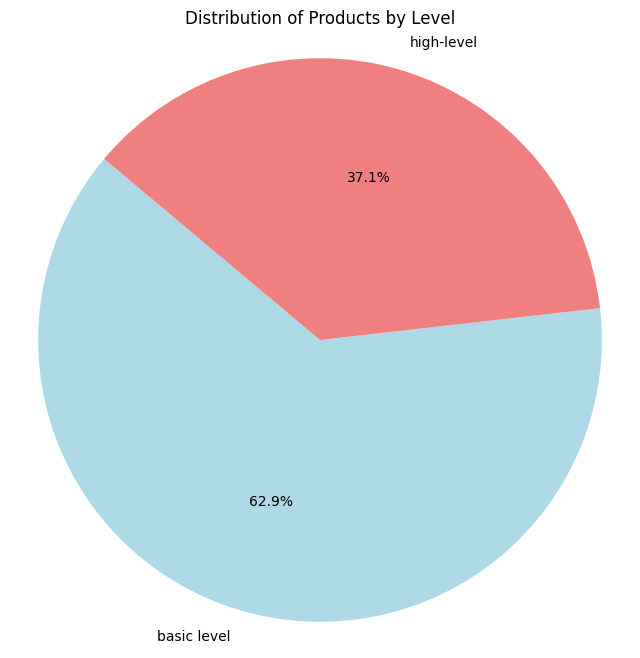

In [90]:
# Count of products by level
product_level_counts = sales_df['Product_Level'].value_counts()
print(product_level_counts)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(product_level_counts, labels=product_level_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=140)
plt.title('Distribution of Products by Level')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()